In [23]:
#https://medium.datadriveninvestor.com/time-series-analysis-with-python-f5ab388b865a

In [8]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [9]:
df=pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


<AxesSubplot:xlabel='datetime'>

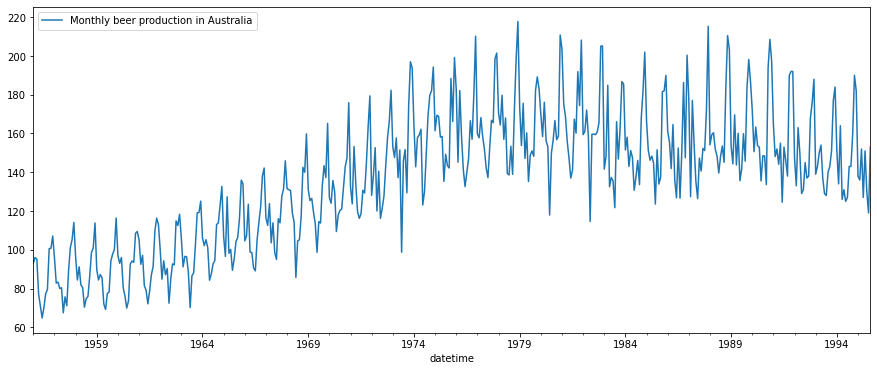

In [10]:
df['datetime'] = pd.to_datetime(df['Month'])
df = df.set_index('datetime')
df.drop(['Month'], axis=1, inplace=True)
df.plot()

In [13]:
ts = df['Monthly beer production in Australia']
ts.head()

datetime
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production in Australia, dtype: float64

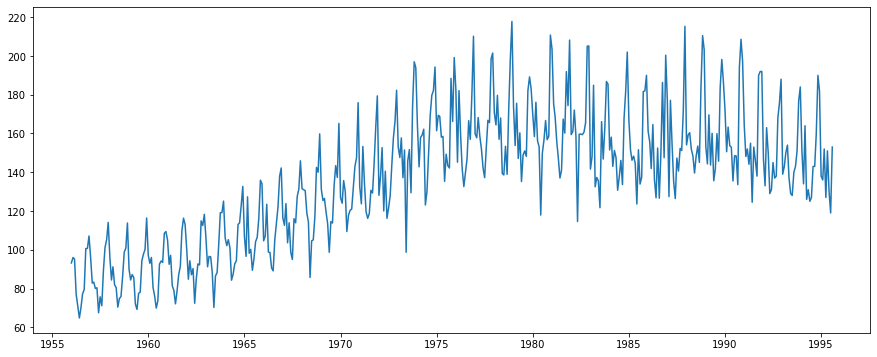

In [14]:
rcParams['figure.figsize'] = 15,6
plt.plot(ts)

In [15]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

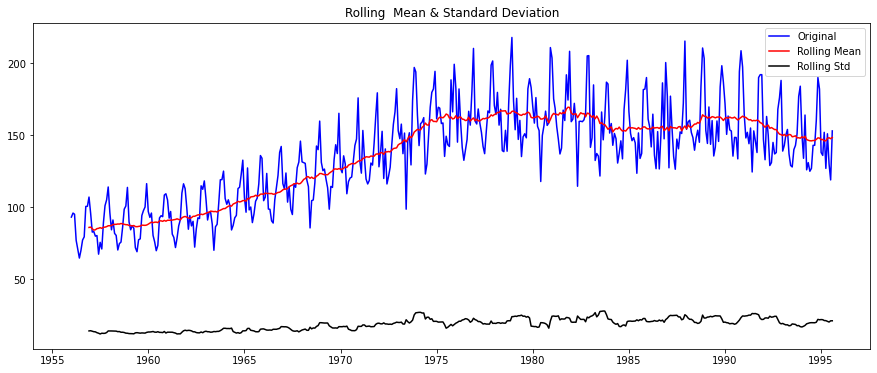

Results of Dickey-Fuller Test:
Test Statistic                  -2.282661
p-value                          0.177621
#Lags Used                      17.000000
Number of Observations Used    458.000000
Critical Value (1%)             -3.444709
Critical Value (5%)             -2.867871
Critical Value (10%)            -2.570142
dtype: float64


In [16]:
test_stationarity(ts)

([<matplotlib.lines.Line2D at 0x1d8ba6f6340>],
 datetime
 1956-01-01    4.534748
 1956-02-01    4.564348
 1956-03-01    4.555980
 1956-04-01    4.345103
 1956-05-01    4.261270
                 ...   
 1995-04-01    4.844187
 1995-05-01    5.017280
 1995-06-01    4.867534
 1995-07-01    4.779123
 1995-08-01    5.030438
 Name: Monthly beer production in Australia, Length: 476, dtype: float64)

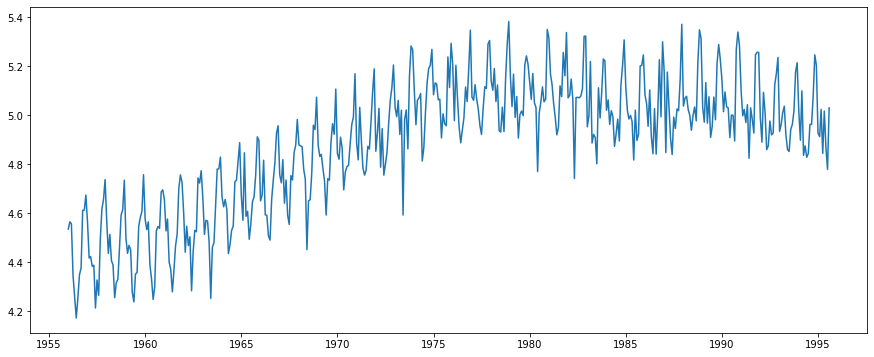

In [21]:
#let's take a log transform for simplicity:
ts_log = np.log(ts)
plt.plot(ts_log), ts_log

([<matplotlib.lines.Line2D at 0x1d8ba578df0>],
 datetime
 1956-01-01         NaN
 1956-02-01         NaN
 1956-03-01         NaN
 1956-04-01         NaN
 1956-05-01         NaN
                 ...   
 1995-04-01    4.975631
 1995-05-01    4.987471
 1995-06-01    4.990739
 1995-07-01    4.985317
 1995-08-01    4.990950
 Name: Monthly beer production in Australia, Length: 476, dtype: float64)

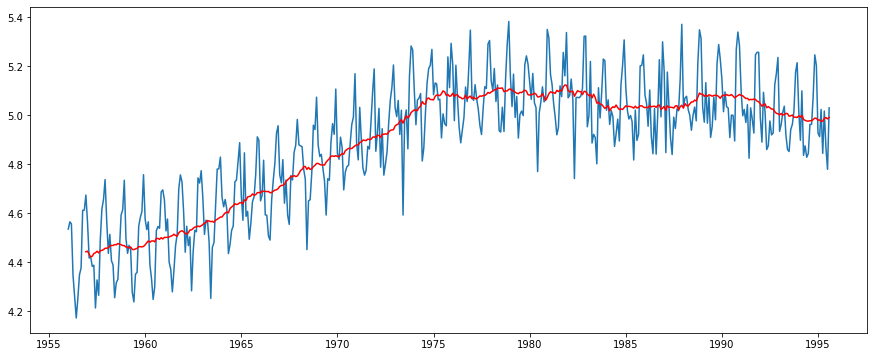

In [20]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red'), moving_avg

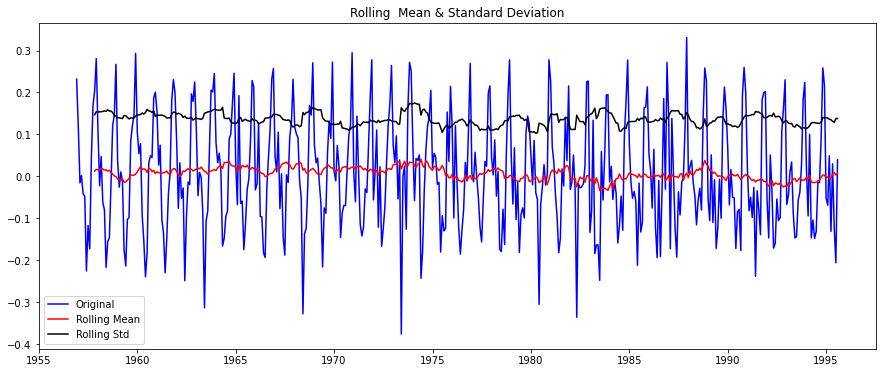

Results of Dickey-Fuller Test:
Test Statistic                  -3.432559
p-value                          0.009898
#Lags Used                      13.000000
Number of Observations Used    451.000000
Critical Value (1%)             -3.444933
Critical Value (5%)             -2.867970
Critical Value (10%)            -2.570195
dtype: float64


In [24]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_avg_diff)

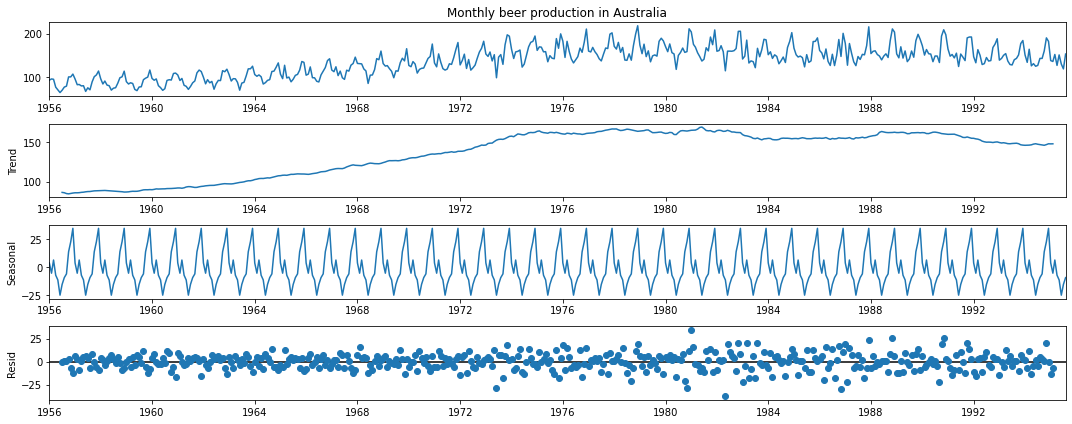

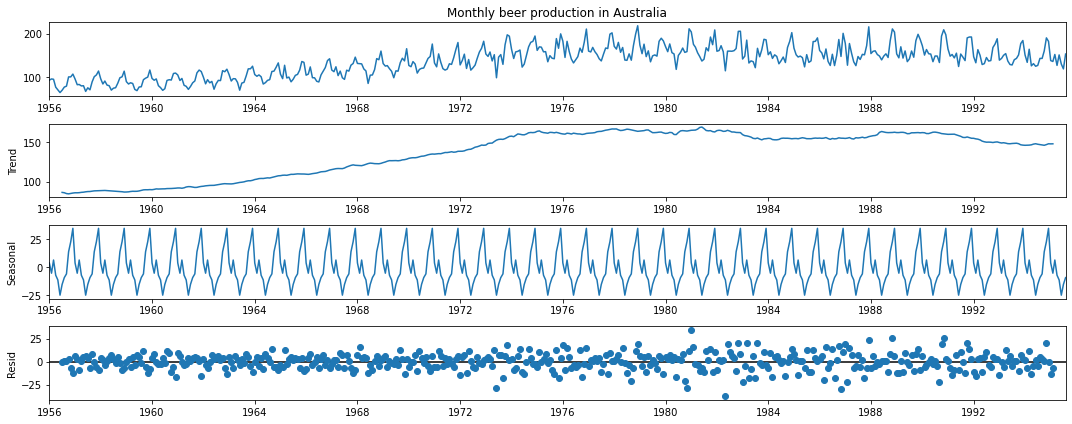

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive')
result.plot()

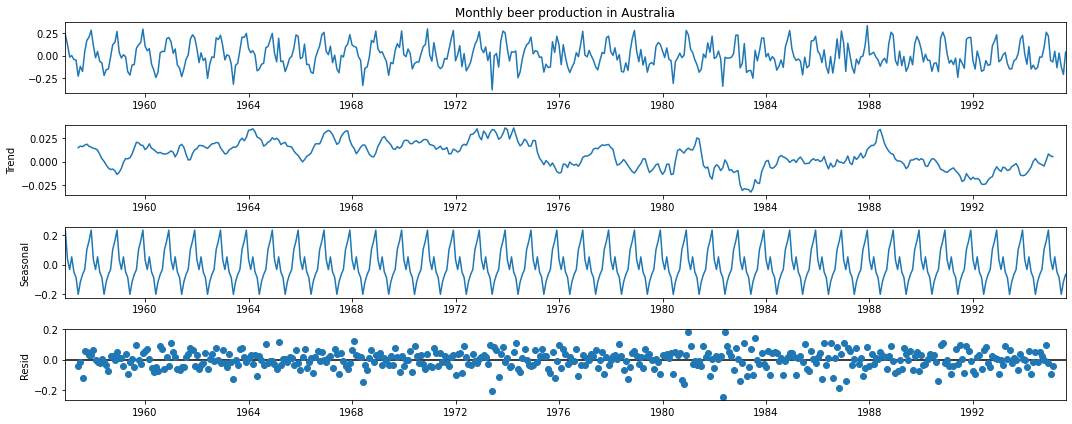

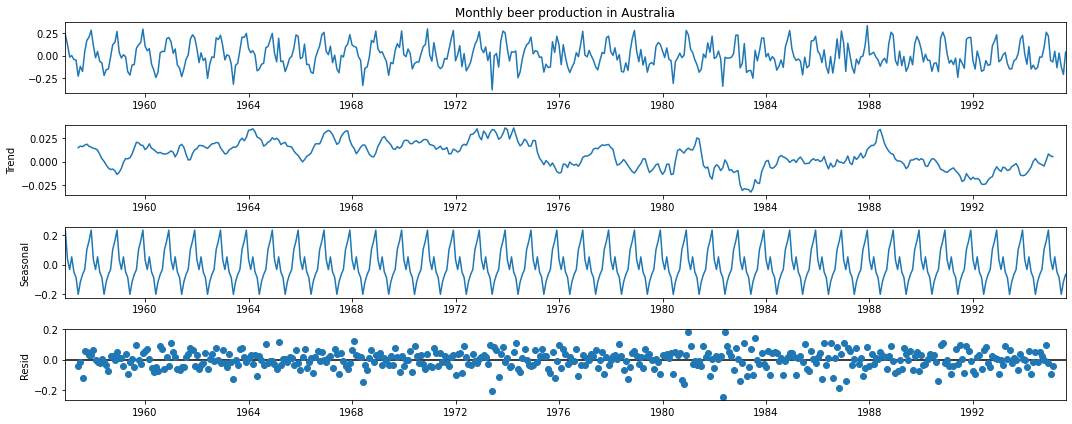

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts_log_moving_avg_diff, model='additive')
result.plot()

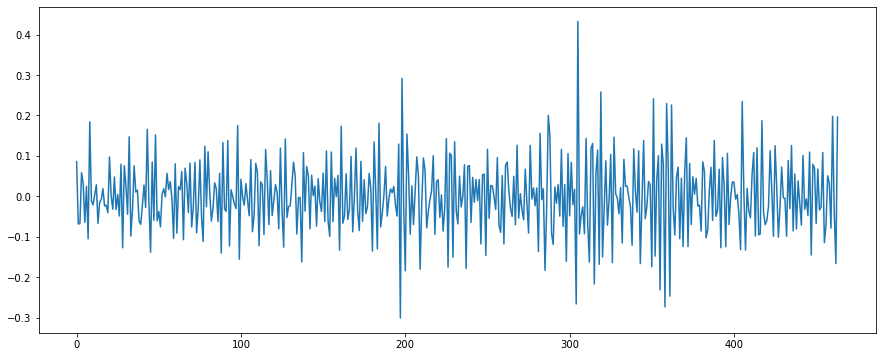

In [27]:
import numpy as np
x=ts_log_moving_avg_diff-result.seasonal
diff=np.diff(x)
plt.plot(diff)

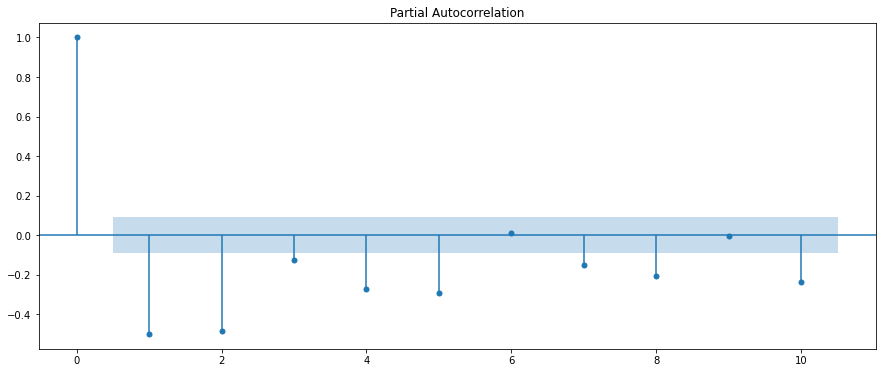

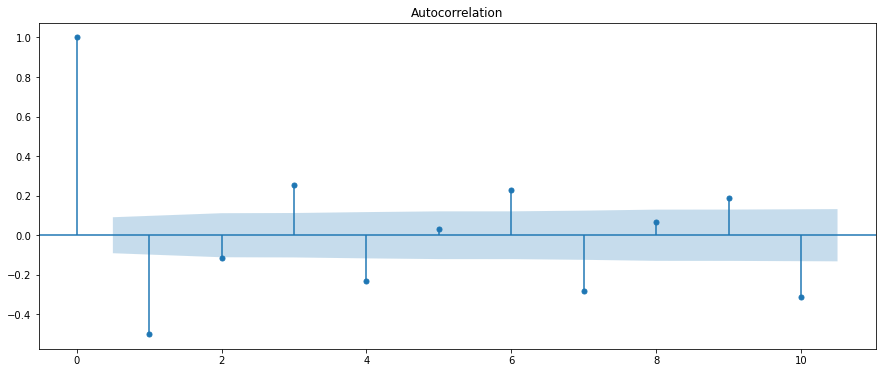

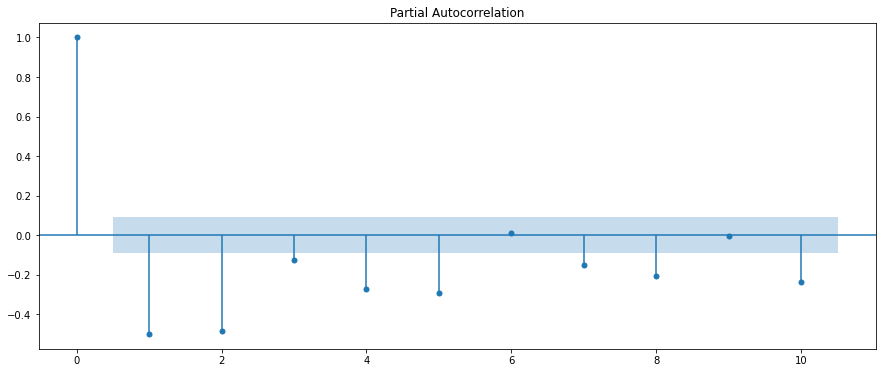

In [28]:
#how many past = p 
#how many past ramdom error term = q
#order of differencing = d
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff, lags=10)
plot_pacf(diff, lags=10)

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(diff, order=(1,2,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  462
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  70.810
Method:                       css-mle   S.D. of innovations              0.207
Date:                Sun, 06 Jun 2021   AIC                           -135.620
Time:                        15:38:35   BIC                           -123.213
Sample:                             2   HQIC                          -130.735
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.006      0.096      0.924      -0.011       0.012
ar.L1.D2.y    -0.6941      0.034    -20.694      0.000      -0.760      -0.628
                                    Roots           

C:\Users\gbabu\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

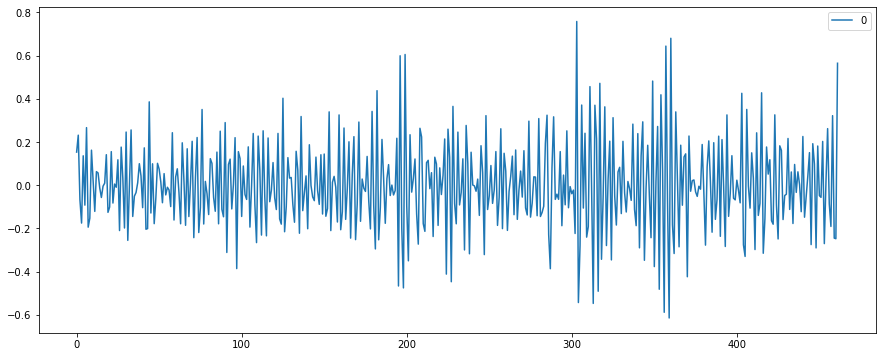

In [30]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags=10)

C:\Users\gbabu\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([114.87255789, 151.53823515, 278.45435331, 335.56404983,
        335.85727029, 379.7409152 , 446.61864367, 452.26773762,
        484.2639549 , 566.6064918 ]),
 array([8.39211052e-027, 1.24133882e-033, 4.57376514e-060, 2.29360491e-071,
        1.93840629e-070, 6.32073151e-079, 2.36348078e-092, 1.20789276e-092,
        1.34354931e-098, 2.49983889e-115]))

In [32]:
train = df[:int(0.7*(len(df)))]
test= df[int(0.7*(len(df))):]
train['Monthly beer production'].plot()
test['Monthly beer production'].plot()

KeyError: 'Monthly beer production'